In [1]:
from treeVisuals import *

def leetparse(s):
    s = s.strip()
    s = s[1:-1]
    lis = s.split(',')
    for i in range(len(lis)):
        if notNull(lis[i]):
            try:
                lis[i] = int(lis[i])
            except:
                pass
    return makeLevel(lis)

## View of Binary Tree

### Left view

[0, 1, 3]


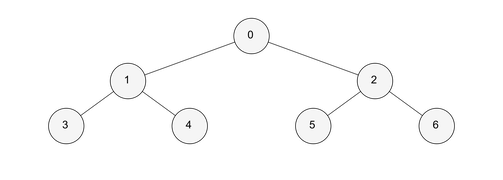

In [2]:
root = make(range(7))

def solve(root):
    d = dict()
    
    def dfs(root, level=0, count=0):
        if root is None: return
        if level not in d:
            d[level] = (count, root.val)
        else:
            if d[level][0] > count:
                d[level] = (count, root.val)
        
        dfs(root.right, level+1, count+1)
        dfs(root.left, level+1, count-1)
    
    dfs(root)
    return [i[1][1] for i in sorted(d.items())]

print(solve(root))
DrawTree(root, (300, 300)).drawTree()

### Top view

[3, 1, 0, 2, 6]


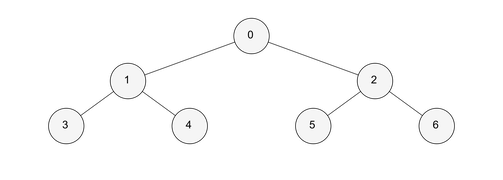

In [3]:
def solve(root):
    d = dict()
    
    def dfs(root, level=0, count=0):
        if root is None: return 
        dfs(root.left, level+1, count-1)
        dfs(root.right, level+1, count+1)
        if count not in d:
            d[count] = (level, root.val)
        else:
            if d[count][0] > level:
                d[count] = (level, root.val)
    
    dfs(root)
    return [i[1][1] for i in sorted(d.items())]

print(solve(root))
DrawTree(root, (300, 300)).drawTree()

### Zig-Zag level Order

[0, 2, 1, 3, 4, 5, 6]


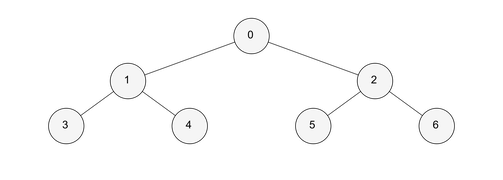

In [4]:
def solve(root):
        from collections import deque
        q = deque([(root)])
        ans = []
        level = 0

        while q:
            s = len(q)
            temp = []
            for _ in range(s):
                node = q.popleft()
                if node:
                    temp.append(node.val)
                    q.append(node.left)
                    q.append(node.right)

            if level&1: ans += temp[::-1][:]
            else: ans += temp[:]

            level += 1
        
        return ans
    
root = make(range(7))
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

## Find Actual Tree from Given Pre, Post, In Or Level orders

## PreOrder and Inorder

preOrder = ***\[root, left sub-tree, right sub-tree\]***  
inOrder = ***\[left sub-tree, root, right sub-tree\]*** 

If we have root, we can easily partition inOrder.  
once we know the size of left sub-tree and right sub-tree from inOrder partition  
we can easily partition the preOrder.  

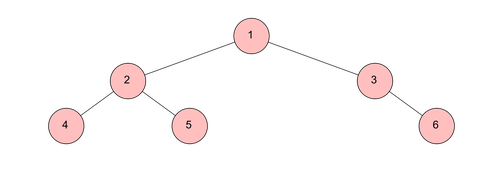

In [5]:
inOrder = [4, 2, 5, 1, 3, 6]
preOrder = [1, 2, 4, 5, 3, 6]

def solve(inOrder, preOrder):
    if not inOrder: return None
    n = len(inOrder)
    
    # get root value
    first = preOrder[0]
    root = Node(first)
    
    # find root in inOrder
    index = -1
    for i in range(n):
        if inOrder[i] == first:
            index = i
            break
            
    # build sub in and pre orders
    left_inOrder = inOrder[:index]
    right_inOrder = inOrder[index+1:]
    
    left_preOrder = preOrder[1: index+1]
    right_preOrder = preOrder[index+1:]
    
    # call recursion
    root.left = solve(left_inOrder, left_preOrder)
    root.right = solve(right_inOrder, right_inOrder)    
    
    return root

root = solve(inOrder, preOrder)
DrawTree(root, (300, 300)).drawTree('red')

### LevelOrder and InOrder

Almost similar trick as of before, but the only problem is how do we find the sub level orders?  
The levelOrder of sub-tree is always in the sequence in the parent sub-tree levelOrder.  
So once got the elements from inorder get the sequence from levelOrder.

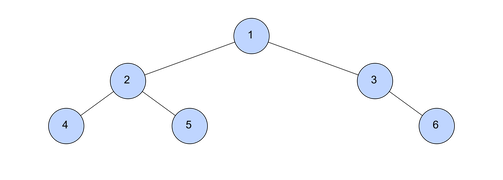

In [6]:
level = [1, 2, 3, 4, 5, 6]
inOrder = [4, 2, 5, 1, 3, 6]

def solve(level, inOrder):
    if not level: return None
    n = len(level)
    
    # get the root value
    first = level[0]
    root = Node(first)
    
    # get root index
    index = -1
    for i in range(n):
        if inOrder[i] == first:
            index = i
            break
    
    # partition inOrder
    inOrder_left = inOrder[:index]
    inOrder_right = inOrder[index+1:]
    
    # build level order on the base of sequence and presence in inOrder
    level_right = [i for i in level if i in inOrder_right]
    level_left = [i for i in level if i in inOrder_left]
    
    # call recursion
    root.left = solve(level_left, inOrder_left)
    root.right = solve(level_right, inOrder_right)
    
    return root

root = solve(level, inOrder)
DrawTree(root, (300, 300)).drawTree('blue')

### Kth Ancestor

5


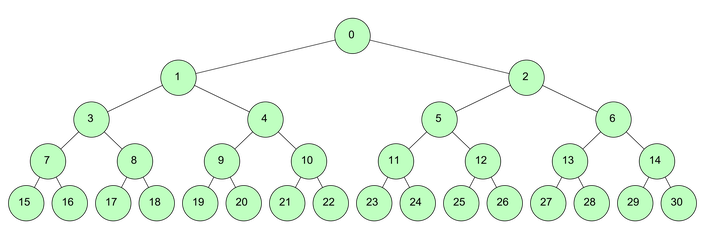

In [7]:
def solve(root, val, k):
    if root is None: return None, 0
    if root.val == val:
        return (root, 1)
    node, l = solve(root.left, val, k)
    if node is not None:
        if l<=k: return root, l+1
        else: return node, l+1
        
    node, l = solve(root.right, val, k)
    if node is not None:
        if l<=k: return root, l+1
        else: return node, l+1
    
    return None, 0

root = make(range(31))
print(solve(root, 24, 2)[0])
DrawTree(root, (300, 300)).drawTree('green')

### Distance between Two Nodes

4


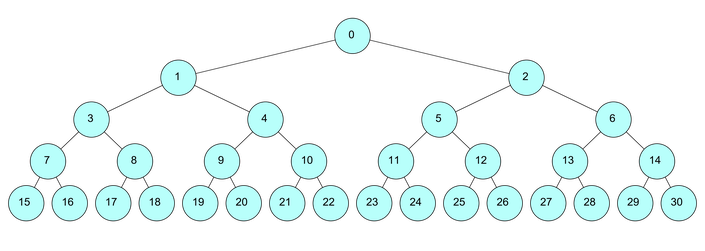

In [8]:
def solve(root, a, b):
    def find(root, a):
        if root is None: return 0
        if root.data == a:
            return 1

        v = find(root.left, a)
        if v: return v+1

        v = find(root.right, a)
        if v: return v+1

        return 0

    def LCA(root, a, b):
        if root is None: return None
        if root.data == a or root.data == b: return root

        r1 = LCA(root.left, a, b)
        r2 = LCA(root.right, a, b)

        if r1 and r2: return root
        if r1 or r2: return r1 if r1 else r2
        return None

    return find(root, a) + find(root, b) - 2*find(root, LCA(root, a, b).data)

root = make(range(31))
print(solve(root, 24, 25))
DrawTree(root, (300, 300)).drawTree('cyan')

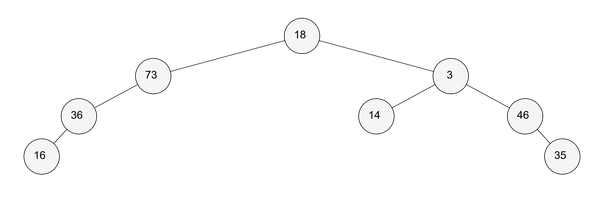

In [9]:
root = randomTree()
DrawTree(root, (300, 300)).drawTree()

### Pairs of node with sum equals root in a root to leaf path

False


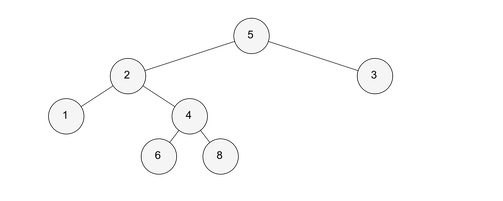

In [10]:
def solve(root):
    temp = root.val
    def rec(root, s=set()):
        if root is None: return False
        if (temp - root.val) in s: return True
        s.add(root.val)
        if rec(root.left, s) or rec(root.right, s): return True
        s.remove(root.val)
        return False
    return rec(root)
        
root = make([5, 2, 3, 1, 4, 'N', 'N', 'N', 'N', 6, 8])
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

28


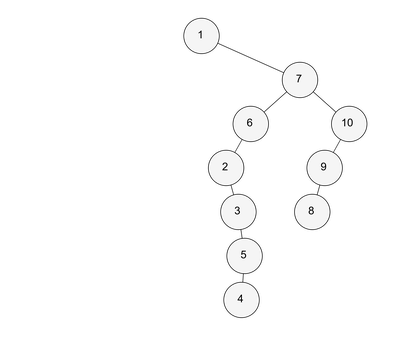

In [11]:
def solve(root):
    def rec(root, l=0):
        if root is None: return (0, l)
        left, l1 = rec(root.left, l+1)
        right, l2 = rec(root.right, l+1)

        if l1 == l2: return (root.data + max(left, right), l1)
        return (root.data + (left if l1 > l2 else right), l1 if l1 > l2 else l2)

    return rec(root, 0)[0]

s = "1 N 7 6 10 2 N 9 N N 3 8 N N 5 N N 4"
lis = list(map(lambda x: int(x) if x.isdigit() else x, s.strip().split()))
root = makeLevel(lis)
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

### Maximum sum Path

231


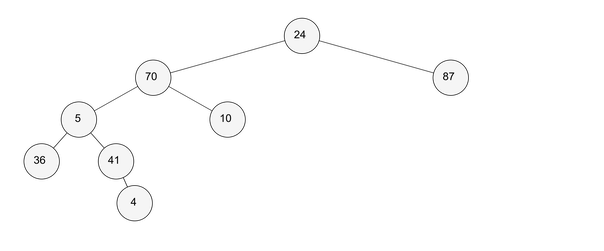

In [12]:
def solve(root):
    inf = int(1e10)
    
    def rec(root):
        if root is None: return 0, -inf
        line1, sub1 = rec(root.left)
        line2, sub2 = rec(root.right)
        line = root.val + max(0, line1, line2)
        sub = max(line, sub1, sub2, root.val + line1 + line2)
        return line, sub
    return rec(root)[1]

root = randomTree()
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

### Max sum path between 2 leaves

231


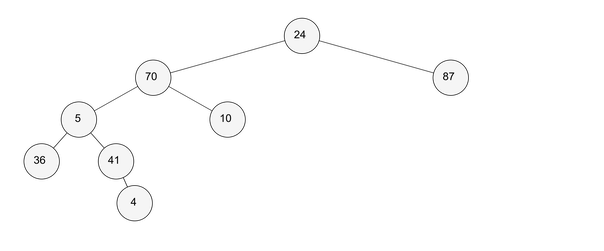

In [13]:
def maxPathSum(root):
    if root is None: return -int(1e10)
    line1 = maxPathSum(root.left)
    line2 = maxPathSum(root.right)
    return root.data + max(0, line1, line2)

lis = [-10, -4, -10, -3, -2, 10, -7, 5, -1, 'n', -10, -6, -6, 10, 8, -3, 0, 5, 4, 'n', -7, 5]
print(solve(root))
DrawTree(root, (300, 300)).drawTree()

### Path sum III
[Link](https://leetcode.com/problems/path-sum-iii/submissions)

3


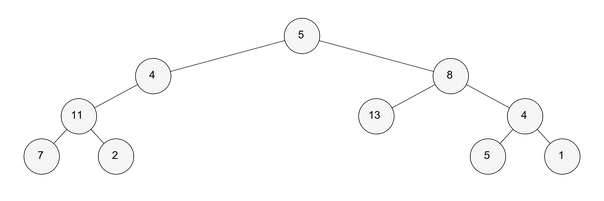

In [14]:
def solve(root, targetSum: int) -> int:
    d = defaultdict(int)
    d[0] = 1  # important
    count = 0

    def dfs(root, s=0):
        nonlocal d, count
        if root is None: return
        s += root.val
        count += d[(s - targetSum)]
        d[s] += 1
        dfs(root.left, s)
        dfs(root.right, s)
        d[s] -= 1

    dfs(root)
    return count

root = leetparse("[5,4,8,11,null,13,4,7,2,null,null,5,1]")
print(solve(root, 22))
DrawTree(root, (300, 300)).drawTree()

### Max of non-adjacent sum of Nodes

24


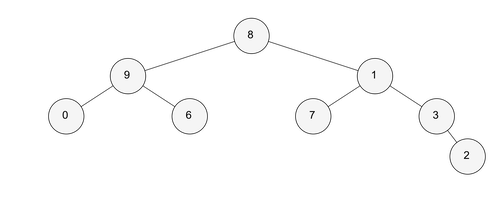

In [15]:
def getMaxSum(root):
        
        # dp solution
        d = dict()
        def solve(root, flag=True):
            if root is None: return 0
            
            if (root, flag) in d: return d[(root, flag)]
            
            # cannot choose
            if not flag:
                b = solve(root.left, True) + solve(root.right, True)
                
                d[(root, flag)] = b
                return b
            # if can choose, check for both
            else:
                a = root.data + solve(root.left, False) + solve(root.right, False)
                b = solve(root.left, True) + solve(root.right, True)
                
                d[(root, flag)] = max(a, b)
                return max(a, b)
        
        return max(solve(root, True), solve(root, False))

root = randomTree(max_range=10)
print(getMaxSum(root))
DrawTree(root, (300, 300)).drawTree()

### Mirror a Binary Tree

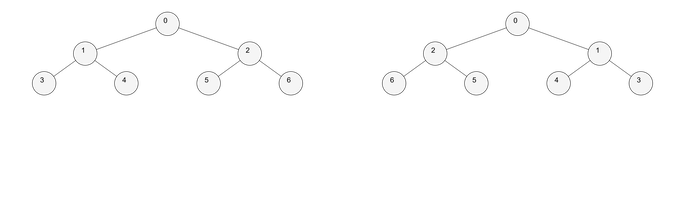

In [16]:
def solve(root):
    if root is None: return None
    droot = Node(root.val)
    droot.right = solve(root.left)
    droot.left = solve(root.right)
    return droot

root = make(range(7))
droot = solve(root)
im1 = DrawTree(root, (200, 200)).drawTree()
im2 = DrawTree(droot, (200, 200)).drawTree()
im = Image.new('RGBA', (700, 200))
im.paste(im1, (0, 0))
im.paste(im2, (350, 0))
im

In [17]:
lis = "94,93,95,92,94,96,94,93,93,93,95,97,97,95,95,92,94,94,94,92,94,94,96,98,98,96,98,96,94,94,96,91,91,93,95,93,95,95,95,91,93,93,95,95,93,97,97,97,97,97,99,95,97,97,99,95,97,93,95,null,95,95,95,90,92,90,92,92,94,94,96,94,null,96,94,94,94,96,null,90,92,null,null,94,null,94,96,null,null,null,null,96,null,null,null,96,98,96,96,96,96,100,100,94,94,98,96,96,96,98,100,94,96,98,98,94,94,94,96,null,null,94,96,94,94,89,91,null,93,91,91,91,91,null,91,null,null,null,null,null,null,93,95,95,95,93,95,null,null,95,93,null,null,null,null,null,93,null,95,93,95,null,97,95,97,95,95,97,99,97,97,null,97,95,null,95,97,101,101,99,99,95,null,93,null,97,99,95,97,97,97,95,95,99,97,101,99,93,93,95,97,97,99,99,null,null,null,null,95,95,95,97,95,null,null,95,null,null,95,null,null,88,88,92,null,null,94,90,92,92,92,90,90,90,92,90,92,null,null,null,94,94,96,null,null,null,94,null,null,null,null,94,null,null,null,94,null,null,null,96,null,96,96,94,94,null,null,null,96,96,94,96,96,100,100,96,98,96,96,null,96,94,null,94,96,null,null,100,102,100,null,null,100,98,98,94,96,92,94,96,98,98,98,94,94,96,98,96,98,96,98,null,96,96,94,98,98,96,98,100,102,98,null,92,94,92,94,96,null,null,null,96,98,98,100,100,100,94,96,94,null,null,96,96,98,null,null,null,null,96,94,null,null,87,89,91,null,null,null,89,89,null,91,93,93,null,93,89,91,89,91,91,89,93,null,91,null,null,null,null,93,null,null,null,null,null,null,null,null,null,null,null,null,null,95,97,null,95,null,null,95,95,97,95,97,95,null,95,95,97,97,101,101,101,101,95,95,97,99,95,null,95,97,97,null,95,null,93,95,null,null,null,null,101,103,99,null,null,101,null,null,null,null,null,93,97,97,null,91,null,95,97,97,97,null,97,null,97,99,95,95,93,null,null,97,97,null,95,null,null,99,95,97,97,99,95,97,95,97,93,95,99,97,97,99,95,97,97,99,99,99,101,101,null,99,91,null,null,null,null,null,null,93,null,97,95,95,97,null,97,97,101,99,null,99,99,null,null,null,97,97,null,null,null,null,97,97,null,null,null,95,null,null,null,null,null,null,null,null,null,null,null,null,92,null,null,null,null,null,null,94,88,null,null,null,90,90,null,null,null,null,88,88,null,null,null,90,null,null,null,null,null,null,null,null,96,96,96,96,96,96,96,94,null,null,96,96,94,null,94,96,96,null,98,96,100,102,null,null,102,102,null,100,94,96,94,null,96,98,98,null,94,96,96,null,98,null,null,null,96,94,null,null,null,94,null,null,null,104,null,100,null,102,null,null,96,96,96,96,null,92,null,96,null,96,null,null,96,null,null,null,null,null,98,null,null,null,94,94,null,null,null,98,null,96,null,null,100,null,96,96,96,98,96,98,98,100,94,null,null,null,null,null,null,98,94,92,96,96,null,100,96,null,98,null,98,100,94,94,96,98,null,96,98,100,98,98,100,100,102,100,100,null,null,null,null,92,92,null,null,null,96,94,null,96,98,98,96,98,96,null,102,null,98,null,null,null,100,100,null,null,null,null,96,98,96,98,null,94,null,null,95,null,87,null,null,91,91,91,87,null,null,89,91,null,null,null,null,null,null,null,null,null,97,95,95,97,null,null,null,null,97,95,null,null,93,null,95,93,null,null,95,null,97,99,95,95,99,null,null,103,101,null,null,103,null,99,95,95,null,95,95,93,null,97,null,null,null,null,93,95,95,97,null,null,null,null,97,null,null,null,null,null,null,null,101,null,101,103,97,97,95,null,null,null,null,97,null,null,95,null,null,null,null,97,null,null,93,93,null,null,97,null,null,null,99,null,95,95,null,null,97,95,null,null,95,null,97,null,97,99,99,null,null,null,null,99,93,95,91,93,97,97,95,95,101,99,null,null,null,null,99,null,null,null,93,null,93,95,97,95,97,99,95,95,97,99,99,101,97,null,null,99,99,99,null,null,103,103,101,101,null,101,null,93,null,91,null,95,null,95,null,97,99,99,97,99,97,97,97,null,95,95,null,null,null,97,101,99,99,101,null,null,null,null,95,null,null,null,93,null,null,null,null,88,null,null,null,null,null,null,null,null,88,null,90,92,null,null,94,96,null,null,96,96,98,null,96,96,null,null,94,96,92,null,94,null,96,98,100,100,null,96,94,null,null,null,102,null,null,null,null,102,null,null,94,94,94,96,null,96,null,null,92,94,96,null,94,null,94,94,null,96,null,98,null,null,null,100,100,102,null,null,98,null,96,98,null,null,null,null,null,null,null,null,94,94,null,94,null,null,null,null,94,96,96,96,96,96,null,96,null,null,96,96,98,98,null,100,98,100,null,null,null,94,94,96,92,92,92,94,null,98,null,98,94,96,94,96,null,null,null,100,null,null,92,null,92,94,null,96,98,96,96,null,98,98,98,null,96,null,96,96,null,null,null,100,98,null,null,100,96,98,null,null,98,98,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,96,96,98,null,null,100,100,96,98,100,98,null,null,96,98,98,98,96,null,94,null,null,null,null,100,98,null,100,null,null,102,null,null,null,null,null,null,87,null,null,null,null,null,95,95,null,97,null,null,null,97,97,null,95,97,95,97,95,null,null,null,null,null,null,null,95,null,null,null,null,null,null,101,97,null,93,null,null,null,null,103,null,null,95,null,95,93,95,95,95,null,null,93,null,93,null,null,null,null,95,95,null,null,95,97,97,99,null,null,null,null,103,null,null,null,95,95,99,null,93,null,null,null,null,null,93,95,97,95,95,97,null,97,97,null,95,null,null,null,null,null,95,97,99,97,97,99,null,null,99,97,101,null,95,null,null,93,97,97,91,93,91,93,93,91,93,93,null,null,99,97,93,93,95,97,93,null,null,95,null,null,null,93,91,93,95,95,95,97,null,null,null,null,null,null,99,null,null,null,null,null,97,null,95,null,null,null,null,null,99,null,null,null,95,95,null,97,97,null,99,99,95,null,null,null,null,null,null,101,99,null,95,95,null,null,null,null,97,99,null,95,99,null,97,null,null,null,97,null,null,null,101,null,99,null,null,null,103,null,null,null,null,null,94,94,null,null,null,null,null,98,94,94,null,null,null,null,96,null,96,null,null,96,null,102,null,98,null,null,null,null,null,null,null,null,94,94,null,94,96,94,null,null,null,null,null,null,null,94,94,null,null,null,null,null,null,null,null,100,null,null,96,94,null,96,null,null,null,null,94,null,null,null,null,96,null,null,94,null,null,96,null,null,96,null,null,null,null,null,96,null,null,null,96,96,null,98,null,null,98,null,null,null,null,102,null,null,92,94,96,null,96,96,null,90,null,null,92,92,null,92,92,null,null,92,null,92,94,92,null,100,96,null,94,null,null,94,96,null,98,null,92,94,94,96,null,null,92,90,null,null,94,null,94,96,94,96,98,96,null,null,null,null,94,96,null,null,94,null,94,94,null,null,null,98,98,null,null,100,null,null,null,102,null,null,96,null,null,96,null,null,null,null,96,null,100,null,null,null,null,null,null,102,null,null,104,104,null,null,null,null,null,97,null,95,95,null,95,97,null,null,95,null,null,103,null,97,95,95,null,null,93,93,null,null,null,95,null,null,null,93,null,null,97,null,93,null,null,null,null,null,95,null,null,null,null,null,null,null,95,97,95,null,95,null,97,99,null,null,null,null,91,93,null,95,null,null,null,97,95,null,89,null,null,91,null,null,null,null,null,null,null,null,91,null,93,95,93,91,null,null,95,null,93,null,95,null,null,null,null,null,null,93,null,null,null,95,null,null,null,null,89,null,null,95,null,null,95,null,95,93,null,null,null,97,95,null,null,null,95,null,null,null,null,95,null,95,99,null,97,null,null,null,null,103,95,null,95,null,null,97,null,null,null,null,null,null,null,null,null,null,null,96,94,null,null,null,98,null,null,null,104,null,null,null,null,null,null,null,null,null,94,94,null,null,null,94,null,98,94,null,null,96,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,94,null,null,null,null,null,null,null,null,null,92,null,null,null,null,94,null,94,null,92,null,94,92,94,94,96,94,92,null,null,null,null,94,94,null,null,96,null,92,null,96,null,null,null,null,null,null,null,94,null,null,null,96,null,null,102,null,null,null,null,null,null,null,null,null,null,null,null,null,null,93,null,93,null,null,null,99,null,null,null,null,null,null,null,null,null,null,null,null,null,null,91,null,null,null,91,null,null,null,null,null,97,null,null,null,91,null,95,null,null,null,null,null,null,null,97,null,null,null,null,101,null,94,null,null,null,null,null,null,92,null,null,null,96,null,null,94,null,null,96,null,null,93,null,null,null,null,null,null,null,97".split(',')
root = makeLevel(lis)
# DrawTree(root, (300, 300)).drawTree()

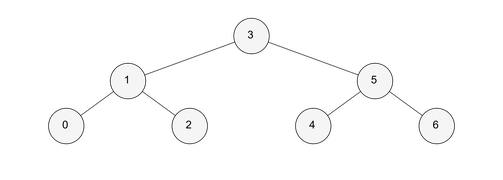

In [18]:
lis = list(range(7))
root = makeMid(lis)
DrawTree(root, (300, 300)).drawTree()

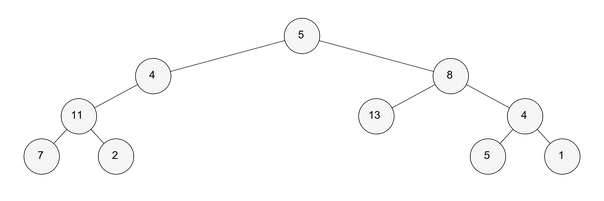

In [19]:
root = leetparse("[5,4,8,11,null,13,4,7,2,null,null,5,1]")
DrawTree(root, (300, 300)).drawTree()